Мы будем использовать в данном задании набор данных Boston, где нужно предсказать стоимость жилья на основе различных характеристик расположения (загрязненность воздуха, близость к дорогам и т.д.). Подробнее о признаках можно почитать по адресу https://archive.ics.uci.edu/ml/datasets/Housing

- Загрузите выборку Boston с помощью функции sklearn.datasets.load_boston(). Результатом вызова данной функции является объект, у которого признаки записаны в поле data, а целевой вектор — в поле target.
- Выведите признаки в выборке к одному масштабу при помощи функции sklearn.preprocessing.scale.
- Переберите разные варианты параметра метрики p по сетке от 1 до 10 с таким шагом, чтобы всего было протестировано 200 вариантов (используйте функцию numpy.linspace). Используйте KNeighborsRegressor с n_neighbors=5 и weights='distance' — данный параметр добавляет в алгоритм веса, зависящие от расстояния до ближайших соседей. В качестве метрики качества используйте среднеквадратичную ошибку (параметр scoring='mean_squared_error' у cross_val_score). Качество оценивайте, как и в предыдущем задании, с помощью кросс-валидации по 5 блокам с random_state = 42, не забудьте включить перемешивание выборки (shuffle=True).
- Определите, при каком p качество на кросс-валидации оказалось оптимальным (обратите внимание, что cross_val_score возвращает массив показателей качества по блокам; необходимо максимизировать среднее этих показателей). Это значение параметра и будет ответом на задачу.


Если ответом является нецелое число, то целую и дробную часть необходимо разграничивать точкой, например, 0.4. При необходимости округляйте дробную часть до одного знака.

Ответ на каждое задание — текстовый файл, содержащий ответ в первой строчке. Обратите внимание, что отправляемые файлы не должны содержать перевод строки в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над тем, чтобы убрать это ограничение.


In [2]:
import sklearn.neighbors as neighbors

In [8]:
import sklearn.datasets

In [9]:
reg = neighbors.KNeighborsRegressor

In [17]:
raw_data = sklearn.datasets.load_boston()

In [22]:
raw_data

{'DESCR': "Boston House Prices dataset\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  

In [23]:
data = raw_data['data']
target = raw_data['target']

In [25]:
import pandas as pd

In [26]:
boston_data = pd.DataFrame(data)
boston_target = pd.DataFrame(target)

In [28]:
boston_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [29]:
boston_target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [30]:
import sklearn.preprocessing

In [35]:
boston_data_scaled = pd.DataFrame(sklearn.preprocessing.scale(boston_data))

In [33]:
boston_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [41]:
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score

In [58]:
def run_knn(p):
    cv = KFold(n = len(boston_target), n_folds = 5, shuffle = True, random_state = 42)
    knn = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='minkowski', p=p)
    score = cross_val_score(estimator=knn, X=boston_data_scaled, y=boston_target, scoring='mean_squared_error', cv=cv)
    return score.mean()

In [59]:
run_knn(1)

-16.050208508436157

In [61]:
import numpy as np

In [63]:
ps = np.linspace(1, 10, num=200)

In [64]:
res = [(run_knn(p), p) for p in ps]

In [65]:
res_df = pd.DataFrame(res)

In [69]:
res_df.sort_values([0])

,0,1
188,-21.109243,9.502513
187,-21.107926,9.457286
186,-21.106974,9.412060
185,-21.102253,9.366834
184,-21.101394,9.321608
199,-21.086617,10.000000
183,-21.076481,9.276382
182,-21.075465,9.231156
181,-21.074951,9.185930
180,-21.073906,9.140704


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

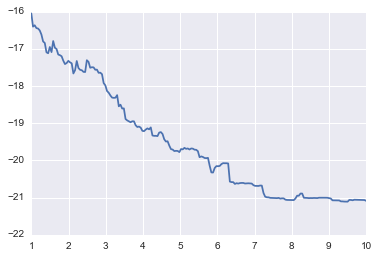

In [74]:
plt.plot(res_df[1], res_df[0])

In [75]:
with open('t2a1.txt', 'w') as fd:
    fd.write('1 ')